<a href="https://colab.research.google.com/github/007ekho/Loan/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Dataset
##About Company
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.
##Problem Statement:-
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
##Features of training dataset:-
1.Loan_ID= Unique Loan ID
2.Gender= Male/ Female
3.Married= Applicant married (Y/N)
4.Dependents= Number of dependents
5.Education= Applicant Education (Graduate/ Under Graduate)
6.Self_Employed= Self-employed (Y/N)
7.ApplicantIncome= Applicant income
8.CoapplicantIncome= Coapplicant income
9.LoanAmount= Loan amount in thousands
10.Loan_Amount_Term= Term of the loan in months
11.Credit_History= Credit history meets guidelines
12.Property_Area= Urban/ Semi-Urban/ Rural
13.Loan_Status= (Target) Loan approved (Y/N)
##Features of a Testing dataset:-
1.Loan_ID= Unique Loan ID
2.Gender= Male/ Female
3.Married= Applicant married (Y/N)
4.Dependents= Number of dependents
5.Education= Applicant Education (Graduate/ Under Graduate)
6.Self_Employed= Self-employed (Y/N)
7.ApplicantIncome= Applicant income
8.CoapplicantIncome= Coapplicant income
9.LoanAmount= Loan amount in thousands
10.Loan_Amount_Term= Term of the loan in months
11.Credit_History= Credit history meets guidelines
12.Property_Area= Urban/ Semi-Urban/ Rural
##Features of Sample_submission dataset:-
1.Loan_ID= Unique Loan ID
2.Loan_Status= (Target) Loan approved (Y/N)
##Evaluation Metric:-
What makes a good solution? How do you evaluate which submission is better than another?
Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in the sample submission.
We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.
Best of luck…👍


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loan = pd.read_csv('/content/drive/MyDrive/Loan_ approval/Training Dataset.csv')

In [ ]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
#loan.loc[loan['Credit_History'].isna()]

In [ ]:
loan.loc[loan['Credit_History'].isna()].shape

(50, 13)

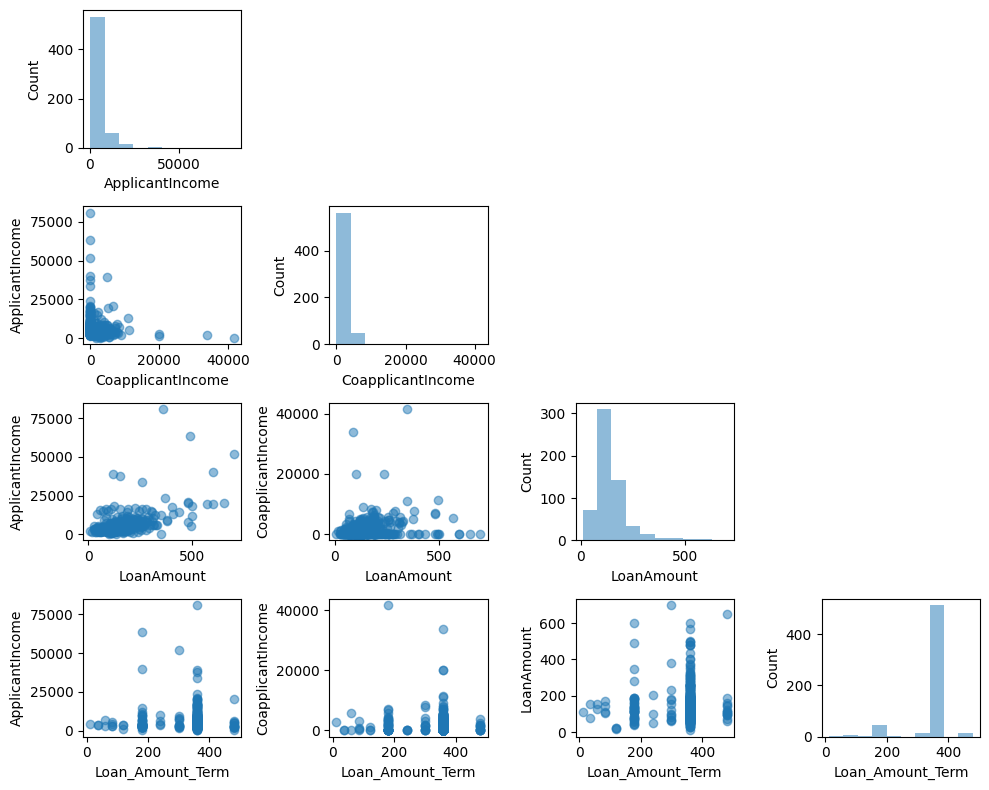

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
scatterplotmatrix(loan[cols].values, figsize=(10, 8),
names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

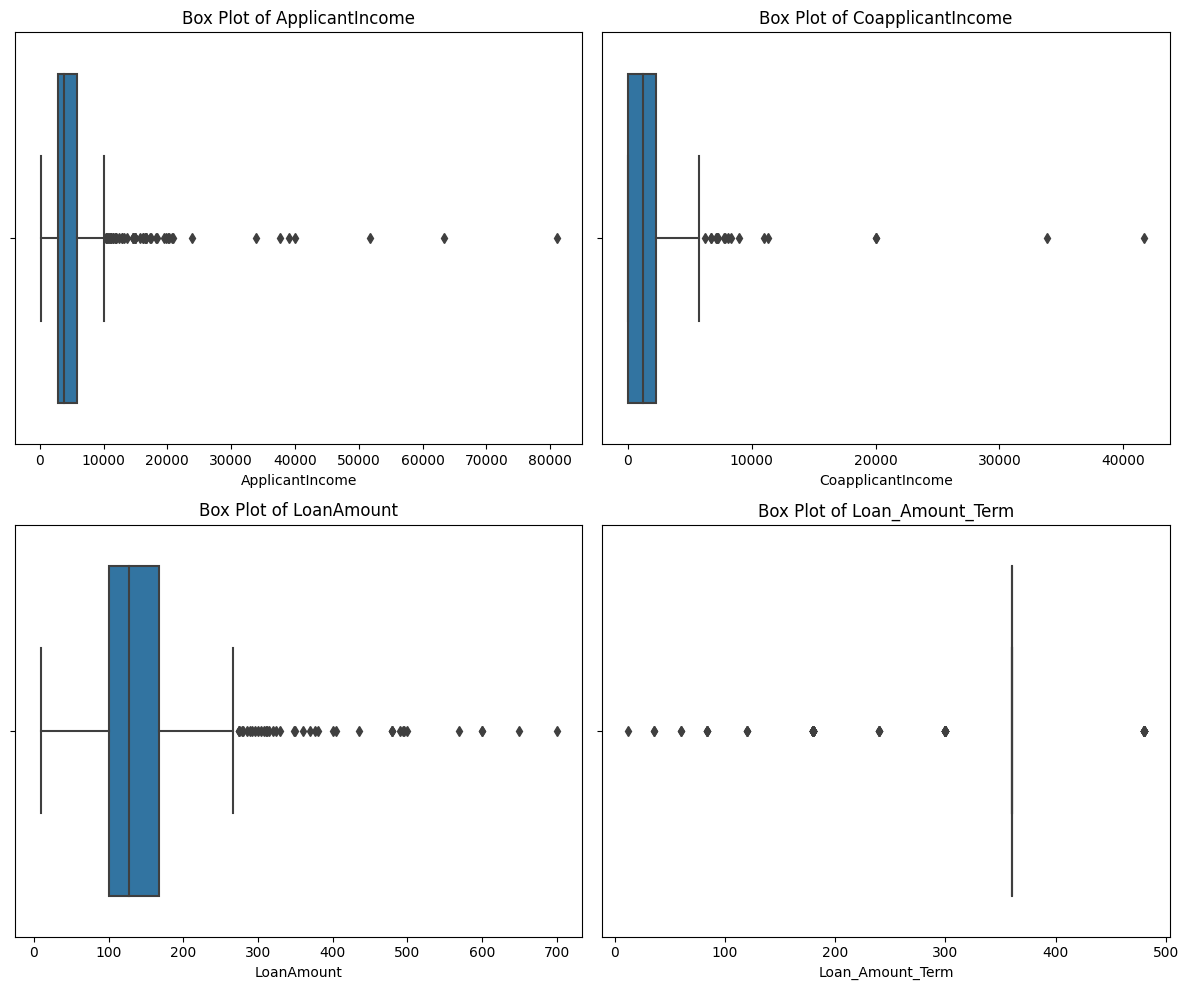

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for the numeric columns (replace these with your actual data)
numeric_column1 = loan['ApplicantIncome']
numeric_column2 = loan['CoapplicantIncome']
numeric_column3 = loan['LoanAmount']
numeric_column4 = loan['Loan_Amount_Term']

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the first box plot in the first subplot
sns.boxplot(x=numeric_column1, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of ApplicantIncome')

# Plot the second box plot in the second subplot
sns.boxplot(x=numeric_column2, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of CoapplicantIncome')

# Plot the third box plot in the third subplot
sns.boxplot(x=numeric_column3, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of LoanAmount')

# Plot the fourth box plot in the fourth subplot
sns.boxplot(x=numeric_column4, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Loan_Amount_Term')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
loan['Loan_Amount_Term'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Loan_Amount_Term, Length: 614, dtype: bool

In [ ]:
import numpy as np

def find_outliers_iqr(data):
    data = np.array(data)

    # Calculate the first and third quartiles (Q1 and Q3)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find the outliers in the data and mark them with -1
    outliers = np.where((data < lower_bound) | (data > upper_bound), -1, 0)

    return outliers

# Example usage:
loan['CoapplicantIncome_Outliers'] = find_outliers_iqr(loan['CoapplicantIncome'])
loan['ApplicantIncome_Outliers'] = find_outliers_iqr(loan['ApplicantIncome'])
loan['LoanAmount_Outliers'] = find_outliers_iqr(loan['LoanAmount'])
loan['Loan_Amount_Term_Outliers'] = find_outliers_iqr(loan['Loan_Amount_Term'])




In [ ]:
loan.loc[loan['CoapplicantIncome']>10000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_Outliers,ApplicantIncome_Outliers,LoanAmount_Outliers,Loan_Amount_Term_Outliers
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,-1,-1,0,0
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,-1,0,0,0
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y,-1,0,0,0
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,-1,0,0,0
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,-1,0,0,0
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,-1,0,0,0


In [ ]:
df = loan

In [ ]:
df = df.dropna()

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_Outliers,ApplicantIncome_Outliers,LoanAmount_Outliers,Loan_Amount_Term_Outliers
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,0,0,0


In [ ]:
df.isna().count()

Loan_ID                       480
Gender                        480
Married                       480
Dependents                    480
Education                     480
Self_Employed                 480
ApplicantIncome               480
CoapplicantIncome             480
LoanAmount                    480
Loan_Amount_Term              480
Credit_History                480
Property_Area                 480
Loan_Status                   480
CoapplicantIncome_Outliers    480
ApplicantIncome_Outliers      480
LoanAmount_Outliers           480
Loan_Amount_Term_Outliers     480
dtype: int64

In [ ]:
#to be considered
#df.loc[df['Self_Employed']=='nan']
df_encoded = pd.get_dummies(df['Property_Area'], prefix='Property_Area')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Property_Area' column since it's no longer needed
df.drop('Property_Area', axis=1, inplace=True)

In [ ]:
df['Dependents'] = np.where(df['Dependents']=='3+',3,df['Dependents'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Animal' column using LabelEncoder
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# # You can also decode the encoded data back to the original labels using inverse_transform
# df['Decoded_Animal'] = label_encoder.inverse_transform(df['Encoded_Animal'])
# print(df)
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,CoapplicantIncome_Outliers,ApplicantIncome_Outliers,LoanAmount_Outliers,Loan_Amount_Term_Outliers,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,0,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,0,0,1


In [ ]:

df['Dependents'] =df['Dependents'].astype('int64')
df.dtypes

Loan_ID                        object
Gender                          int64
Married                         int64
Dependents                      int64
Education                       int64
Self_Employed                   int64
ApplicantIncome                 int64
CoapplicantIncome             float64
LoanAmount                    float64
Loan_Amount_Term              float64
Credit_History                float64
Loan_Status                     int64
CoapplicantIncome_Outliers      int64
ApplicantIncome_Outliers        int64
LoanAmount_Outliers             int64
Loan_Amount_Term_Outliers       int64
Property_Area_Rural             uint8
Property_Area_Semiurban         uint8
Property_Area_Urban             uint8
dtype: object

In [ ]:
y= df['Loan_Status']
columns_to_drop = ['Loan_Status', 'Loan_ID', 'CoapplicantIncome_Outliers','ApplicantIncome_Outliers','LoanAmount_Outliers','Loan_Amount_Term_Outliers']

X = df.drop(columns=columns_to_drop,axis=1)


In [ ]:
X.loc[X.isna().any(axis=1)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn.fit(X_train, y_train)
# plot_decision_regions(X_train_std_np,y_train_np, clf=knn, filler_feature_values={2: 0, 3: 0},
#                       filler_feature_ranges={2: 3, 3: 2}, legend=2, markers='xo')


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compare predictions against the actual y_test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.62
Precision: 0.58
Recall: 0.62
F1-score: 0.59
Confusion Matrix:
[[ 8 30]
 [16 66]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already split your data into X_train_std, X_test_std, y_train, and y_test

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Compare predictions against the actual y_test
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - F1-score: {f1_rf:.2f}")
print("Random Forest - Confusion Matrix:")
print(conf_matrix_rf)


Random Forest - Accuracy: 0.79
Random Forest - Precision: 0.81
Random Forest - Recall: 0.79
Random Forest - F1-score: 0.76
Random Forest - Confusion Matrix:
[[15 23]
 [ 2 80]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already split your data into X_train_std, X_test_std, y_train, and y_test

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=1)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Compare predictions against the actual y_test
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost - Precision: {precision_xgb:.2f}")
print(f"XGBoost - Recall: {recall_xgb:.2f}")
print(f"XGBoost - F1-score: {f1_xgb:.2f}")
print("XGBoost - Confusion Matrix:")
print(conf_matrix_xgb)


XGBoost - Accuracy: 0.76
XGBoost - Precision: 0.75
XGBoost - Recall: 0.76
XGBoost - F1-score: 0.75
XGBoost - Confusion Matrix:
[[20 18]
 [11 71]]


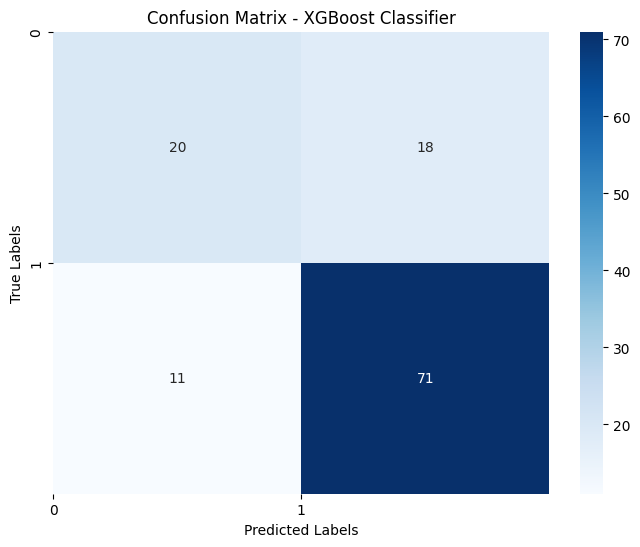

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))

# Show the plot
plt.show()








# Building the  proxy model using bruteforce query

In [ ]:
#Loading the dataset
loan_test = pd.read_csv('/content/drive/MyDrive/Loan_ approval/Test Dataset.csv')
X_loan_test = loan_test



In [ ]:

X_loan_test_encoded = pd.get_dummies(X_loan_test['Property_Area'], prefix='Property_Area')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
X_loan_test = pd.concat([X_loan_test, X_loan_test_encoded], axis=1)

# Drop the original 'Property_Area' column since it's no longer needed
X_loan_test.drop('Property_Area', axis=1, inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Animal' column using LabelEncoder
X_loan_test['Married'] = label_encoder.fit_transform(X_loan_test['Married'])
X_loan_test['Education'] = label_encoder.fit_transform(X_loan_test['Education'])
X_loan_test['Self_Employed'] = label_encoder.fit_transform(X_loan_test['Self_Employed'])
X_loan_test['Gender'] = label_encoder.fit_transform(X_loan_test['Gender'])
# # You can also decode the encoded data back to the original labels using inverse_transform
# df['Decoded_Animal'] = label_encoder.inverse_transform(df['Encoded_Animal'])
# print(df)
X_loan_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,0,0,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,0,0,1


In [ ]:
X_loan_test=X_loan_test.drop(columns='Loan_ID',axis=1)
print(X_loan_test.dtypes)

Gender                       int64
Married                      int64
Dependents                  object
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object


In [ ]:
X_loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   367 non-null    int64  
 1   Married                  367 non-null    int64  
 2   Dependents               357 non-null    object 
 3   Education                367 non-null    int64  
 4   Self_Employed            367 non-null    int64  
 5   ApplicantIncome          367 non-null    int64  
 6   CoapplicantIncome        367 non-null    int64  
 7   LoanAmount               362 non-null    float64
 8   Loan_Amount_Term         361 non-null    float64
 9   Credit_History           338 non-null    float64
 10  Property_Area_Rural      367 non-null    uint8  
 11  Property_Area_Semiurban  367 non-null    uint8  
 12  Property_Area_Urban      367 non-null    uint8  
dtypes: float64(3), int64(6), object(1), uint8(3)
memory usage: 29.9+ KB


In [ ]:
X_loan_test=X_loan_test.dropna()

In [ ]:
X_loan_test['Dependents']=np.where(X_loan_test['Dependents']== '3+',3,X_loan_test['Dependents'])
X_loan_test['Dependents']=X_loan_test['Dependents'].astype('int64')


<ipython-input-563-6d4e671af7d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_loan_test['Dependents']=np.where(X_loan_test['Dependents']== '3+',3,X_loan_test['Dependents'])
<ipython-input-563-6d4e671af7d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_loan_test['Dependents']=X_loan_test['Dependents'].astype('int64')


In [ ]:
y_pred_xg = xgb_classifier.predict(X_loan_test.iloc[[0]])

In [ ]:
# Convert X_loan_test to a DMatrix for XGBoost


# Make predictions using the trained XGBoost classifier
y_pred_xg = xgb_classifier.predict(X_loan_test)
loan_status_test = []
# X_loan_test['loan_status_test']
for i in y_pred_xg:
  loan_status_test.append(i)
X_loan_test['loan_status_test']=loan_status_test
print(X_loan_test['loan_status_test'])

# # Print the predictions
# print(y_pred_xg)

0      1
1      1
2      1
4      0
5      1
      ..
361    1
362    1
363    1
365    1
366    1
Name: loan_status_test, Length: 321, dtype: int64


<ipython-input-565-7a6c87dbf03b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_loan_test['loan_status_test']=loan_status_test


In [ ]:
print(X_loan_test.columns)
print(xgb_classifier.feature_names_in_)  # If available, use xgb_classifier.get_booster().feature_names


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'loan_status_test'],
      dtype='object')
['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area_Rural' 'Property_Area_Semiurban'
 'Property_Area_Urban']


In [ ]:
X_loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,loan_status_test
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,0,0,1,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,0,0,1,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,0,0,1,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,0,0,1,0
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,0,0,2269,2167,99.0,360.0,1.0,0,1,0,1
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,0,0,1,1
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,0,0,1,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,1,0,0,1


# PROXY MODEL TRAINING

In [ ]:
y_lan_test= X_loan_test['loan_status_test']
X_lan_test = X_loan_test.drop(columns='loan_status_test',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_traint, X_testt, y_traint, y_testt = train_test_split(X_lan_test, y_lan_test, test_size=0.25, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already split your data into X_train_std, X_test_std, y_train, and y_test

# Create and train the XGBoost classifier
xgb_class = xgb.XGBClassifier(n_estimators=100, random_state=1)
xgb_class.fit(X_traint, y_traint)

# Make predictions on the test data
y_pred_xgt = xgb_class.predict(X_testt)

# Compare predictions against the actual y_test
accuracy_xgt = accuracy_score(y_testt, y_pred_xgt)
precision_xgt = precision_score(y_testt, y_pred_xgt, average='weighted')
recall_xgt = recall_score(y_testt, y_pred_xgt, average='weighted')
f1_xgt = f1_score(y_testt, y_pred_xgt, average='weighted')
conf_matrix_xgt = confusion_matrix(y_testt, y_pred_xgt)

print(f"XGBoost - Accuracy: {accuracy_xgt:.2f}")
print(f"XGBoost - Precision: {precision_xgt:.2f}")
print(f"XGBoost - Recall: {recall_xgt:.2f}")
print(f"XGBoost - F1-score: {f1_xgt:.2f}")
print("XGBoost - Confusion Matrix:")
print(conf_matrix_xgt)


XGBoost - Accuracy: 0.85
XGBoost - Precision: 0.86
XGBoost - Recall: 0.85
XGBoost - F1-score: 0.84
XGBoost - Confusion Matrix:
[[16 10]
 [ 2 53]]


In [ ]:
bbl_sur = xgb_class.predict(X_test)
accuracy_bbsur = accuracy_score(y_test, bbl_sur)
print(accuracy_bbsur)

0.8083333333333333
